In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Preparing Data

In [18]:
GPT_data = pd.read_csv("clean_1.csv")
GPT_data.columns = ["Emily's Investment", "Emily's Interest 1", "Emily's Interest 2", "Uni Steals %",
                    "Mom's Investment", "Mom's Interest", "Moe Steal Rate", "Keyword (mode)", "Correct Answer",
                     "ChatGPT's Answer", "Difference with ChatGPT's and Correct Answer", "temperature",
                    "top_p", "frequency_penalty", "prescence penalty", "Prompt"]
GPT_data.head(3)

,Emily's Investment,Emily's Interest 1,Emily's Interest 2,Uni Steals %,Mom's Investment,Mom's Interest,Moe Steal Rate,Keyword (mode),Correct Answer,ChatGPT's Answer,Difference with ChatGPT's and Correct Answer,temperature,top_p,frequency_penalty,prescence penalty,Prompt
0,5000,8,7,1,9650,8,10,one word,55,500,445,0.6,1,0,0,Emily invested $5000 in two different accounts...
1,5000,7,1,1,4130,8,10,one word,55,50,5,0.6,1,0,0,Emily invested $5000 in two different accounts...
2,5000,3,3,1,4380,9,10,one word,55,50,5,0.6,1,0,0,Emily invested $5000 in two different accounts...


## Data Frame with Input Values

In [19]:
inputs_df = GPT_data.iloc[:, :8]
inputs_df.head(3)

,Emily's Investment,Emily's Interest 1,Emily's Interest 2,Uni Steals %,Mom's Investment,Mom's Interest,Moe Steal Rate,Keyword (mode)
0,5000,8,7,1,9650,8,10,one word
1,5000,7,1,1,4130,8,10,one word
2,5000,3,3,1,4380,9,10,one word


## Data Frame with Output Values

In [20]:
output_df = GPT_data.iloc[:, 8:15]
output_df.head(3)

,Correct Answer,ChatGPT's Answer,Difference with ChatGPT's and Correct Answer,temperature,top_p,frequency_penalty,prescence penalty
0,55,500,445,0.6,1,0,0
1,55,50,5,0.6,1,0,0
2,55,50,5,0.6,1,0,0


## ChatGPT's Accuracy

In [21]:
# dataframe that has rows where chatGPT got correct answer
correct_df = GPT_data[ GPT_data["Difference with ChatGPT's and Correct Answer"] == 0 ]

# calculate and print statistics
print(f"Times that ChatGPT answered correctly: {len(correct_df)}")
print(f"Times that ChatGPT answered incorrectly: {len(output_df)-len(correct_df)}")
print(f"Total times that ChatGPT answered: {len(output_df)}")
print(f"Percent that ChatGPT was correct: {len(correct_df)/len(output_df)*100:.2f}%")

Times that ChatGPT answered correctly: 3335
Times that ChatGPT answered incorrectly: 62664
Total times that ChatGPT answered: 65999
Percent that ChatGPT was correct: 5.05%


## Count of Different ChatGPT's Answers

In [22]:
# Count base on reoccuring values of a column
occurs_df = output_df.groupby(["ChatGPT's Answer"]).size().to_frame()
occurs_df.columns = ["Occurrences"]

occurs_df.sort_values( by = "Occurrences", ascending = False).head()

,Occurrences
ChatGPT's Answer,
50,33422
550,11533
500,9470
55,3335
250,1680


## Pie Chart of all ChatGPT's answers

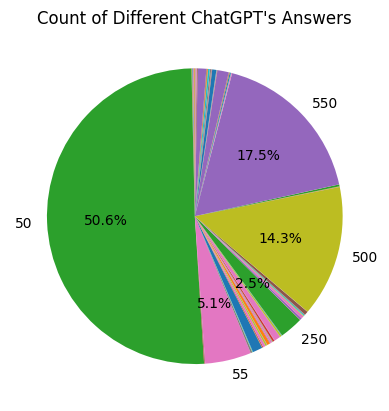

In [23]:
# Do not show data and filter that is less than threshold (%)
threshold = 2.0
def my_autopct(pct):
    return f'{pct:.1f}%' if pct >= threshold else ''
    
threshold_value = len(output_df) * (threshold / 100)
filtered_labels = [label if value >= threshold_value else '' for label, value in zip(occurs_df.index, occurs_df["Occurrences"])]

plt.pie(occurs_df["Occurrences"] , labels = filtered_labels, autopct = my_autopct, startangle = 90)
plt.title("Count of Different ChatGPT's Answers")
plt.show()

## Average and Ratio of temperature and top_p

In [24]:
# temperature: the randomness of word selection
# top_p : how many words it considers for selection
# high temperature, low top_p : unsure of answer
# low temperature, high top_p : confident in answer

# calculate average
temperature_mean = output_df.groupby("ChatGPT's Answer")["temperature"].mean().to_frame()
top_p_mean = output_df.groupby("ChatGPT's Answer")["top_p"].mean().to_frame()
# calculate ratio
ratio_tem_top = (temperature_mean["temperature"] / top_p_mean["top_p"]).to_frame()

# create column names
temperature_mean.columns = ["Average temperature"]
top_p_mean.columns = ["Average top_p"]
ratio_tem_top.columns = ["Ratio"]

# merege all data frames into one
concat_df = pd.concat([occurs_df, temperature_mean, top_p_mean, ratio_tem_top], axis = 1)
concat_df.sort_values( by = "Occurrences", ascending = False)

,Occurrences,Average temperature,Average top_p,Ratio
ChatGPT's Answer,,,,
50,33422,0.468907,0.733319,0.639430
550,11533,0.498951,0.803000,0.621358
500,9470,0.531214,0.880359,0.603407
55,3335,0.585007,0.936732,0.624520
250,1680,0.598214,0.963095,0.621137
...,...,...,...,...
325,5,1.000000,1.000000,1.000000
245,5,1.000000,1.000000,1.000000
71,5,1.000000,1.000000,1.000000


## Statistics of Keyword Mode

In [25]:
# Get count of keywords from all answers
keymode_df = inputs_df.groupby(["Keyword (mode)"]).size().to_frame()

# Get count of keywords from correct answers
keycor_df = pd.concat([correct_df["Keyword (mode)"], correct_df["ChatGPT's Answer"]], axis = 1)
keycor_df = keycor_df.groupby("Keyword (mode)").size().to_frame()

# x% of correct answers was gotten from total correct, respective total keywords, all answers
keycor_totalcor = (keycor_df[0] / len(correct_df)).to_frame()
keycor_totalkey = (keycor_df[0] / keymode_df[0]).to_frame()
keycor_totalall = (keycor_df[0] / len(output_df)).to_frame()

# merege all data frames into one
concat_keycor_df = pd.concat([keymode_df, keycor_df, keycor_totalcor, keycor_totalkey, keycor_totalall ], axis = 1)
concat_keycor_df.columns = ["Occurrences from All Answers", "Occurrences with Correct Answer",
                            "Occurrence % of Correct Answers", "Occurrence % of Respective Keyword Answers",
                            "Occurrence% of All Answers"]

# lambda func for percent format
for col in concat_keycor_df.columns[2:5]:
    concat_keycor_df[col] = concat_keycor_df[col].apply(lambda num: '{:.2%}'.format(num))

concat_keycor_df
# Total answers: 65999, Correct answers: 3335

,Occurrences from All Answers,Occurrences with Correct Answer,Occurrence % of Correct Answers,Occurrence % of Respective Keyword Answers,Occurrence% of All Answers
Keyword (mode),,,,,
one floaing point value,15000,1036,31.06%,6.91%,1.57%
one float,16000,1944,58.29%,12.15%,2.95%
one integer,17000,235,7.05%,1.38%,0.36%
one word,17999,120,3.60%,0.67%,0.18%
